In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt, seaborn as sns

import IPython.display as ipd

plt.rcParams['figure.figsize'] = (10, 3)

# Data preprocessing

## Features

In [2]:
def rename_fma_features(features):
    df_features_name = features.iloc[:2,1:]
    new_feature_name = ['track_id']
    for i in range(len(df_features_name.columns)):
        feat = df_features_name.iloc[:,i]
        feat_name = feat.name.split('.')[0]
        stat = feat[0]
        num = feat[1]
        name = feat_name+'_'+num+'_'+stat
        new_feature_name.append(name)
    return_df = features.iloc[3:,:].reset_index(drop=True)
    return_df.columns = new_feature_name
    return return_df

In [3]:
raw_features = pd.read_csv('/kaggle/input/fma-free-music-archive-small-medium/fma_metadata/features.csv', low_memory=False)
features = rename_fma_features(raw_features)

let's get features with nice and simple feature names

In [4]:
features = features.apply(pd.to_numeric)

In [5]:
features

,track_id,chroma_cens_01_kurtosis,chroma_cens_02_kurtosis,chroma_cens_03_kurtosis,chroma_cens_04_kurtosis,chroma_cens_05_kurtosis,chroma_cens_06_kurtosis,chroma_cens_07_kurtosis,chroma_cens_08_kurtosis,chroma_cens_09_kurtosis,...,tonnetz_04_std,tonnetz_05_std,tonnetz_06_std,zcr_01_kurtosis,zcr_01_max,zcr_01_mean,zcr_01_median,zcr_01_min,zcr_01_skew,zcr_01_std
0,2,7.180653,5.230309,0.249321,1.347620,1.482478,0.531371,1.481593,2.691455,0.866868,...,0.054125,0.012226,0.012111,5.758890,0.459473,0.085629,0.071289,0.000000,2.089872,0.061448
1,3,1.888963,0.760539,0.345297,2.295201,1.654031,0.067592,1.366848,1.054094,0.108103,...,0.063831,0.014212,0.017740,2.824694,0.466309,0.084578,0.063965,0.000000,1.716724,0.069330
2,5,0.527563,-0.077654,-0.279610,0.685883,1.937570,0.880839,-0.923192,-0.927232,0.666617,...,0.040730,0.012691,0.014759,6.808415,0.375000,0.053114,0.041504,0.000000,2.193303,0.044861
3,10,3.702245,-0.291193,2.196742,-0.234449,1.367364,0.998411,1.770694,1.604566,0.521217,...,0.074358,0.017952,0.013921,21.434212,0.452148,0.077515,0.071777,0.000000,3.542325,0.040800
4,20,-0.193837,-0.198527,0.201546,0.258556,0.775204,0.084794,-0.289294,-0.816410,0.043851,...,0.095003,0.022492,0.021355,16.669037,0.469727,0.047225,0.040039,0.000977,3.189831,0.030993
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106569,155316,-0.490129,0.463834,2.321970,-0.084352,1.662914,2.115189,-0.237794,5.695442,0.830353,...,0.128410,0.022547,0.019816,4.448255,0.172852,0.028773,0.028320,0.003906,0.955388,0.012385
106570,155317,-0.461559,-0.229601,-0.496632,-0.422033,0.130612,-0.263825,-0.628103,-0.082687,-0.229483,...,0.132964,0.023548,0.026527,3.270612,0.196289,0.031116,0.027832,0.002441,1.283060,0.019059
106571,155318,0.552473,-0.110498,-0.532014,0.263131,-0.224011,-0.530972,1.713526,1.418444,1.325197,...,0.108324,0.017540,0.020471,2.356727,0.212891,0.038450,0.037109,0.003418,0.828569,0.017904
106572,155319,-0.176901,0.187208,-0.050664,0.368843,0.066005,-0.857354,-0.780860,0.626281,-0.630938,...,0.088311,0.018328,0.017936,6.188604,0.167480,0.041480,0.038086,0.004883,1.818740,0.020133


## Labels

- **Genre**

In [6]:
tracks = pd.read_csv('/kaggle/input/fma-free-music-archive-small-medium/fma_metadata/tracks.csv', index_col=0, low_memory=False)

In [7]:
# ONLY genre_top, genre as Labels
track_info = tracks[["track.7",'track.8']]
track_info.columns = track_info.iloc[0].rename('track_id')
track_info = track_info.iloc[2:]

In [8]:
track_info

track_id,genre_top,genres
2,Hip-Hop,[21]
3,Hip-Hop,[21]
5,Hip-Hop,[21]
10,Pop,[10]
20,NaN,"[76, 103]"
...,...,...
155316,Rock,[25]
155317,Rock,[25]
155318,Rock,[25]
155319,Rock,[25]


In [9]:
track_info.loc[pd.isnull(track_info).any(1)]

track_id,genre_top,genres
20,NaN,"[76, 103]"
26,NaN,"[76, 103]"
30,NaN,"[76, 103]"
46,NaN,"[76, 103]"
48,NaN,"[76, 103]"
...,...,...
155276,NaN,"[15, 32, 38]"
155277,NaN,"[15, 32, 38]"
155278,NaN,"[42, 107]"
155288,NaN,[]


In [10]:
track_info.genre_top.value_counts()

Rock                   14182
Experimental           10608
Electronic              9372
Hip-Hop                 3552
Folk                    2803
Pop                     2332
Instrumental            2079
International           1389
Classical               1230
Jazz                     571
Old-Time / Historic      554
Spoken                   423
Country                  194
Soul-RnB                 175
Blues                    110
Easy Listening            24
Name: genre_top, dtype: int64

In [11]:
track_info.genre_top.value_counts().sum()

49598

56976 tracks have no `genre_top`! Only 49598 tracks have specified genre.

But they have specific genre id(in `genres`). 

From `genres.csv`, we can derive the parent genre(=`genre_top`) of each genre id.

In [12]:
# put parent genre of the first genre in 'genres' to non-specified 'genre_top'

track_info_wo_genre = track_info.loc[pd.isnull(track_info).any(1)]
genres_df = pd.read_csv('/kaggle/input/fma-free-music-archive-small-medium/fma_metadata/genres.csv')
genre_names = []
for i in track_info_wo_genre.genres:
    j = eval(i)+[0]
    if j[0] != 0:
        top_level = genres_df[genres_df.genre_id==j[0]].top_level.values[0]
        parent_genre = genres_df[genres_df.genre_id==top_level]['title'].values[0]
    else:
        parent_genre = np.nan
    genre_names.append(parent_genre)
track_info_ = track_info.copy()
track_info_.loc[track_info_wo_genre.index, 'genre_top'] = genre_names

In [13]:
track_info_.loc[pd.isnull(track_info_).any(1)]

track_id,genre_top,genres
613,NaN,[]
1213,NaN,[]
1216,NaN,[]
1217,NaN,[]
3276,NaN,[]
...,...,...
155192,NaN,[]
155193,NaN,[]
155194,NaN,[]
155195,NaN,[]


Now we have 2231 songs that have no genre. Let us just ignore them.

In [14]:
track_info_.genre_top.value_counts()

Electronic             25046
Experimental           22724
Rock                   21282
Pop                     8015
Folk                    6083
Hip-Hop                 4534
Instrumental            4367
International           2924
Jazz                    2293
Classical               2102
Blues                   1676
Soul-RnB                 920
Spoken                   768
Country                  726
Old-Time / Historic      710
Easy Listening           173
Name: genre_top, dtype: int64

In [15]:
track_info_.genre_top.value_counts().sum()

104343

Put label and features together and drop nan labels

In [16]:
track_info_.index = pd.to_numeric(track_info_.index)
genres = track_info_[['genre_top']]
data = pd.concat([genres, features.set_index('track_id')], axis=1).dropna()

In [17]:
data

,genre_top,chroma_cens_01_kurtosis,chroma_cens_02_kurtosis,chroma_cens_03_kurtosis,chroma_cens_04_kurtosis,chroma_cens_05_kurtosis,chroma_cens_06_kurtosis,chroma_cens_07_kurtosis,chroma_cens_08_kurtosis,chroma_cens_09_kurtosis,...,tonnetz_04_std,tonnetz_05_std,tonnetz_06_std,zcr_01_kurtosis,zcr_01_max,zcr_01_mean,zcr_01_median,zcr_01_min,zcr_01_skew,zcr_01_std
2,Hip-Hop,7.180653,5.230309,0.249321,1.347620,1.482478,0.531371,1.481593,2.691455,0.866868,...,0.054125,0.012226,0.012111,5.758890,0.459473,0.085629,0.071289,0.000000,2.089872,0.061448
3,Hip-Hop,1.888963,0.760539,0.345297,2.295201,1.654031,0.067592,1.366848,1.054094,0.108103,...,0.063831,0.014212,0.017740,2.824694,0.466309,0.084578,0.063965,0.000000,1.716724,0.069330
5,Hip-Hop,0.527563,-0.077654,-0.279610,0.685883,1.937570,0.880839,-0.923192,-0.927232,0.666617,...,0.040730,0.012691,0.014759,6.808415,0.375000,0.053114,0.041504,0.000000,2.193303,0.044861
10,Pop,3.702245,-0.291193,2.196742,-0.234449,1.367364,0.998411,1.770694,1.604566,0.521217,...,0.074358,0.017952,0.013921,21.434212,0.452148,0.077515,0.071777,0.000000,3.542325,0.040800
20,Pop,-0.193837,-0.198527,0.201546,0.258556,0.775204,0.084794,-0.289294,-0.816410,0.043851,...,0.095003,0.022492,0.021355,16.669037,0.469727,0.047225,0.040039,0.000977,3.189831,0.030993
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155316,Rock,-0.490129,0.463834,2.321970,-0.084352,1.662914,2.115189,-0.237794,5.695442,0.830353,...,0.128410,0.022547,0.019816,4.448255,0.172852,0.028773,0.028320,0.003906,0.955388,0.012385
155317,Rock,-0.461559,-0.229601,-0.496632,-0.422033,0.130612,-0.263825,-0.628103,-0.082687,-0.229483,...,0.132964,0.023548,0.026527,3.270612,0.196289,0.031116,0.027832,0.002441,1.283060,0.019059
155318,Rock,0.552473,-0.110498,-0.532014,0.263131,-0.224011,-0.530972,1.713526,1.418444,1.325197,...,0.108324,0.017540,0.020471,2.356727,0.212891,0.038450,0.037109,0.003418,0.828569,0.017904
155319,Rock,-0.176901,0.187208,-0.050664,0.368843,0.066005,-0.857354,-0.780860,0.626281,-0.630938,...,0.088311,0.018328,0.017936,6.188604,0.167480,0.041480,0.038086,0.004883,1.818740,0.020133


In [18]:
# data.to_csv('data_FMA_genre_clf.csv')

# Feature Engineering

## Manual Selection

This procedure is not ideal for data-driven analysis, but based on my experience with MIR, I will select some feature variables manually. This reduces computational cost and makes it easy to analyze feature importance.

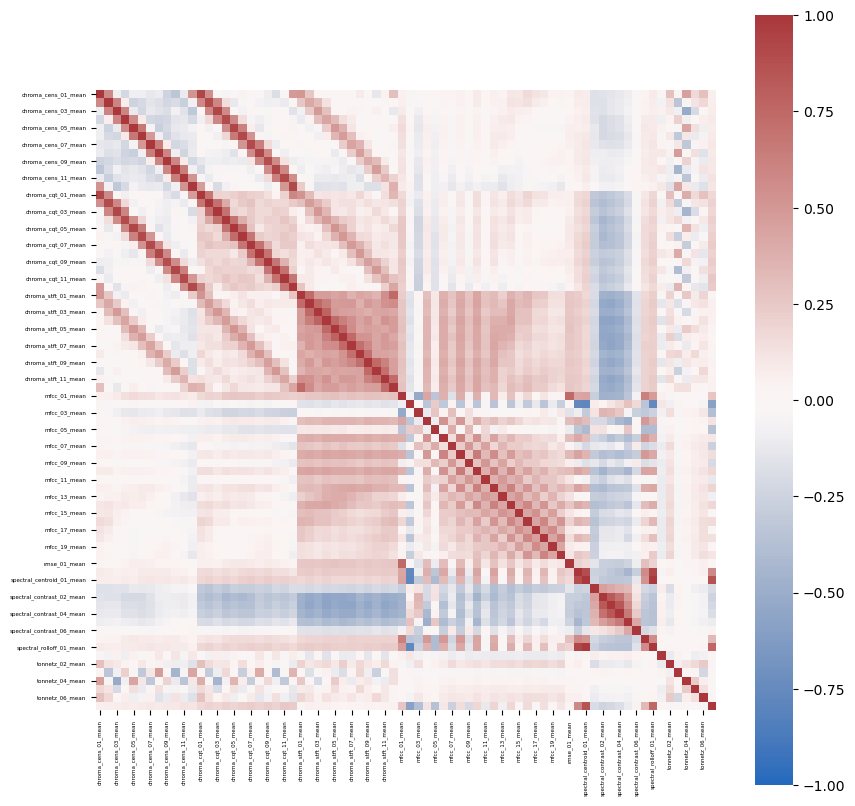

In [19]:
df_ft_mean = data[[col for col in data.columns if 'mean' in col]]

plt.figure(figsize=(10,10))
sns.heatmap(df_ft_mean.corr(), cmap='vlag', vmin=-1, vmax=1,center=0, square=True)
plt.xticks(fontsize = 4)
plt.yticks(fontsize = 4)
plt.show()

- Since chromagram obtained from STFT, CQT, CENS have similar characteristic, I decided to choose only one of them: 'CQT'

- Also for spectral features, I remove bandwidth and rolloff because centroids, bandwidth, and rolloff features are very highly correlated.

In [20]:
columns_cens = [col for col in data.columns if 'cens' in col]
columns_cstft = [col for col in data.columns if 'stft' in col]
columns_sband = [col for col in data.columns if 'bandwidth' in col]
columns_srolloff = [col for col in data.columns if 'rolloff' in col]

In [21]:
data_ = data.drop(columns=columns_cens+columns_cstft+columns_sband+columns_srolloff)

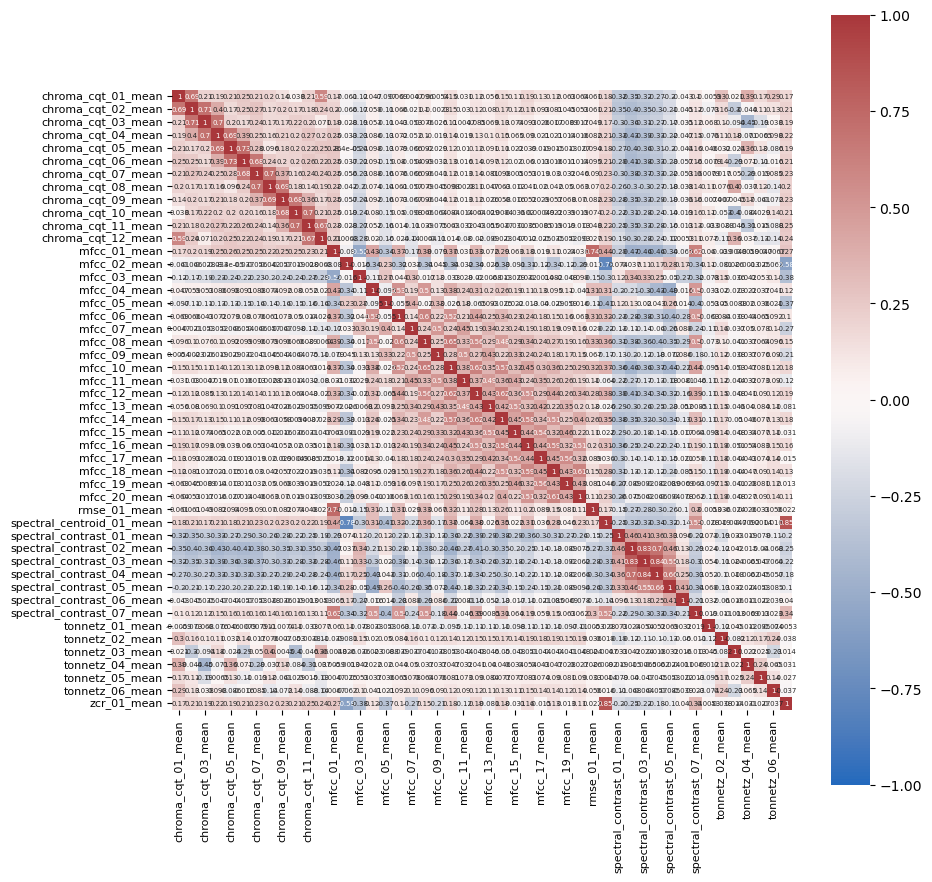

In [22]:
df_ft_mean = data_[[col for col in data_.columns if 'mean' in col]]
plt.figure(figsize=(10,10))
sns.heatmap(df_ft_mean.corr(), cmap='vlag', vmin=-1, vmax=1,center=0, square=True, annot=True, annot_kws={'fontsize':5})
plt.xticks(fontsize = 8)
plt.yticks(fontsize = 8)
plt.show()

## PCA analysis

- with only "mean" features

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, FactorAnalysis

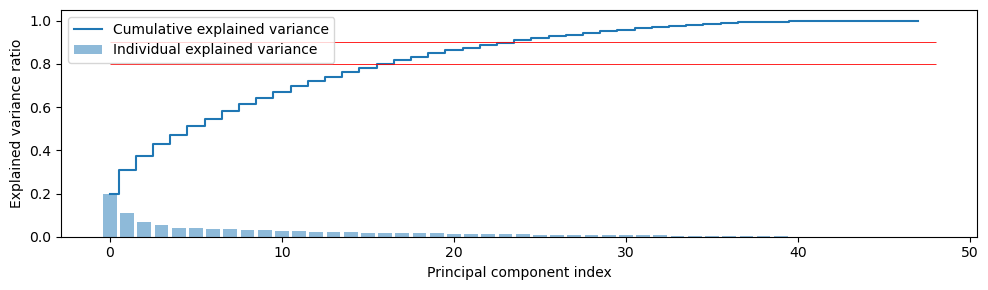

In [24]:
sc = StandardScaler()
df_ft_mean_scaled = sc.fit_transform(df_ft_mean)

pca = PCA()
ft_pca = pca.fit_transform(df_ft_mean_scaled)

exp_var_pca = pca.explained_variance_ratio_
cum_sum_eigenvalues = np.cumsum(exp_var_pca)

plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.hlines(0.8, xmin=0, xmax=len(cum_sum_eigenvalues), color='red', linewidth=.6)
plt.hlines(0.9, xmin=0, xmax=len(cum_sum_eigenvalues), color='red', linewidth=.6)
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

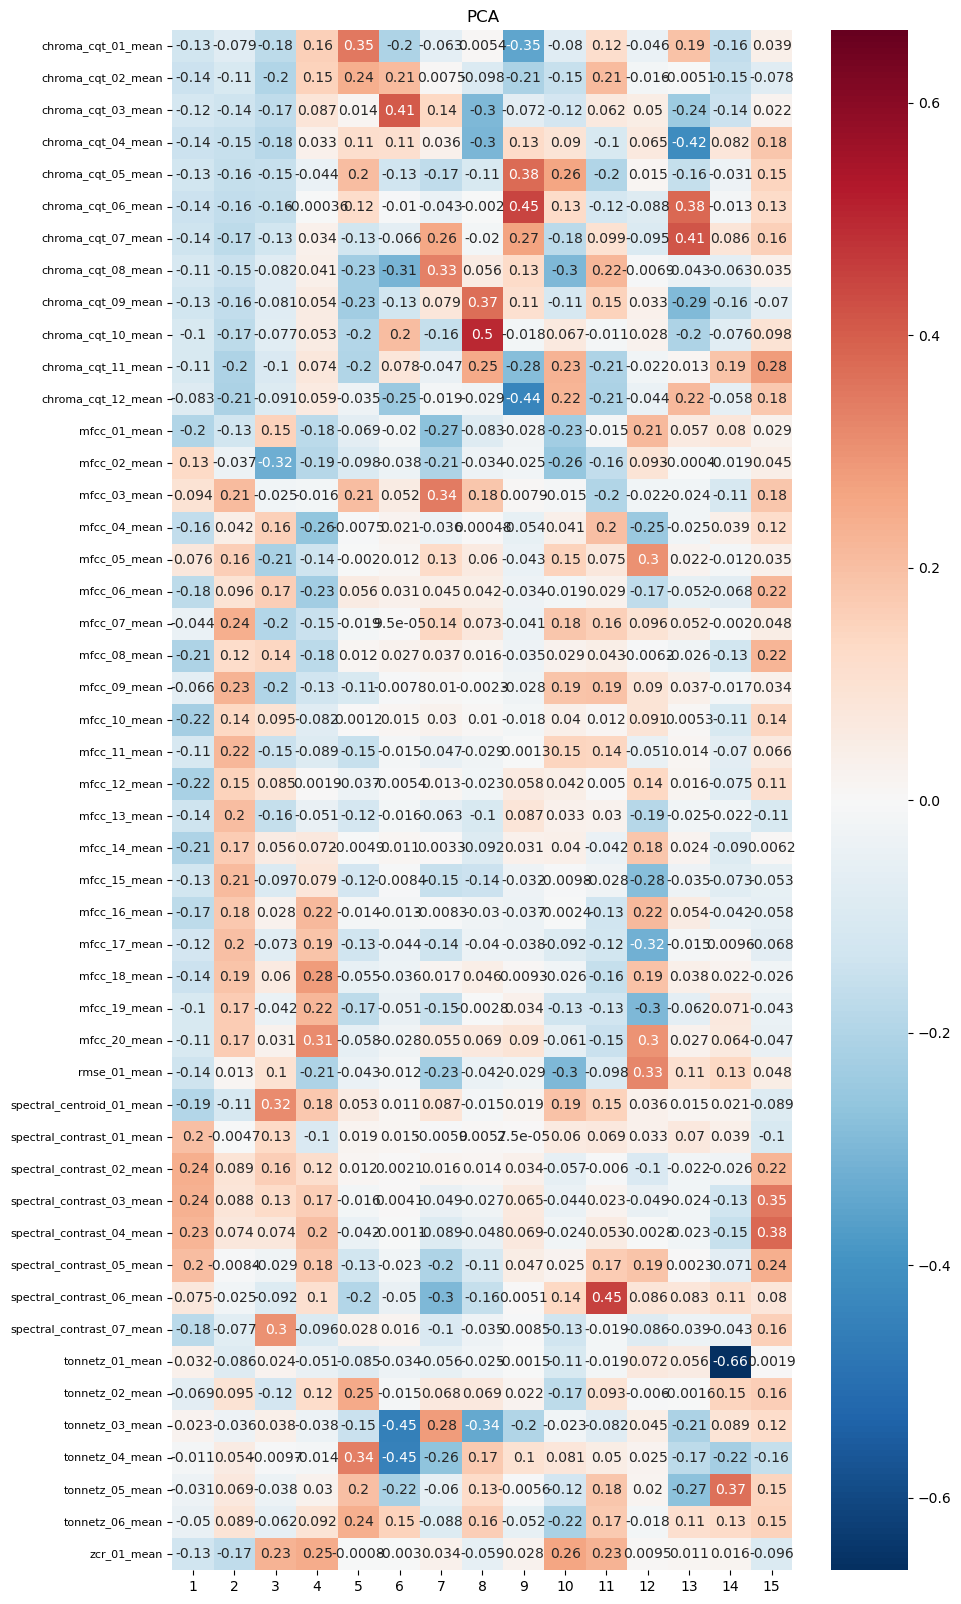

In [25]:
n_comps = 15 # 0.8 explained variance for pca
feature_names = df_ft_mean.columns

methods = [
    ("PCA", PCA())]

for (method, fa) in methods:
    fig, ax = plt.subplots(figsize=(10,20))
    fa.set_params(n_components=n_comps)
    fa.fit(df_ft_mean_scaled)

    components = fa.components_.T

    vmax = np.abs(components).max()
    sns.heatmap(components, cmap="RdBu_r", vmax=vmax, vmin=-vmax, ax=ax, annot=True)
    ax.set_yticklabels(labels=feature_names, rotation=0, fontdict={'fontsize':8})
    ax.set_xticklabels(labels= range(1, n_comps+1))
    ax.set_title(str(method))
    plt.show()

# Classification with ML models

In [26]:
from xgboost import XGBClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix, \
ConfusionMatrixDisplay, classification_report

from sklearn.model_selection import train_test_split

## Genre Ambiguity and Label Imbalance

In [27]:
top_genres = data_.genre_top.value_counts()
top_genres

Electronic             25046
Experimental           22724
Rock                   21282
Pop                     8015
Folk                    6083
Hip-Hop                 4534
Instrumental            4367
International           2924
Jazz                    2293
Classical               2102
Blues                   1676
Soul-RnB                 920
Spoken                   768
Country                  726
Old-Time / Historic      710
Easy Listening           173
Name: genre_top, dtype: int64

- The 'International' genre was deleted because it was not related to musical characteristics.

- Genres with less than 1000 songs will be deleted.

In [28]:
international_ids = data_[data_['genre_top']=='International'].index
data_ = data_.drop(index=international_ids)

In [29]:
small_genres = top_genres[top_genres<1000].index
for x in small_genres:
    ids = data_[data_['genre_top']==x].index
    data_ = data_.drop(index=ids)

In [30]:
len(data_)

98122

## Data Split

In [31]:
raw_X = data_.drop(columns=['genre_top'])

labels = data_.loc[:,'genre_top']
cat_y = pd.Categorical(labels)
y = pd.Series(cat_y.codes)

# train / test
raw_X_train, raw_X_test, y_train, y_test = train_test_split(raw_X, y, test_size=0.3, shuffle=True, random_state=123)

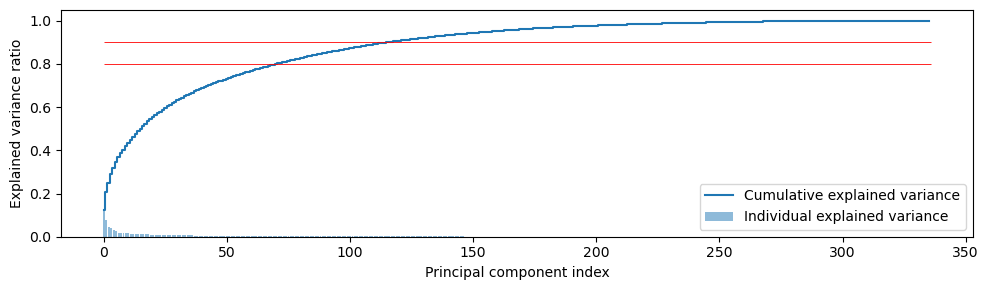

In [32]:
sc = StandardScaler()
raw_X_scaled_train = sc.fit_transform(raw_X_train)
raw_X_scaled_test = sc.transform(raw_X_test)

pca = PCA()
ft_pca = pca.fit_transform(raw_X_scaled_train)

exp_var_pca = pca.explained_variance_ratio_
cum_sum_eigenvalues = np.cumsum(exp_var_pca)

plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.hlines(0.8, xmin=0, xmax=len(cum_sum_eigenvalues), color='red', linewidth=.6)
plt.hlines(0.9, xmin=0, xmax=len(cum_sum_eigenvalues), color='red', linewidth=.6)
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [33]:
n_comps = 60 # 0.8 explained variance for pca
pca = PCA(n_components=n_comps)
X_train = pca.fit_transform(raw_X_scaled_train)
X_train = pd.DataFrame(X_train, index=raw_X_train.index, columns=[f'PCA_{n}' for n in range(1,n_comps+1)])
X_test = pca.transform(raw_X_scaled_test)
X_test = pd.DataFrame(X_test, index=raw_X_test.index, columns=[f'PCA_{n}' for n in range(1,n_comps+1)])

In [34]:
y_train.value_counts()

2    17612
3    15947
9    14857
8     5574
4     4245
5     3198
6     3016
7     1592
1     1460
0     1184
dtype: int64

In [35]:
y_test.value_counts()

2    7434
3    6777
9    6425
8    2441
4    1838
6    1351
5    1336
7     701
1     642
0     492
dtype: int64

## Model

### XGBoost

In [36]:
xgb = XGBClassifier(n_estimators=50)

In [37]:
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=50, n_jobs=0,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, ...)

In [38]:
y_true = y_test.copy()
y_pred = xgb.predict(X_test)

In [39]:
print('XGB Accuracy: ', accuracy_score(y_true, y_pred))
print('XGB F1: ', f1_score(y_true, y_pred, average='macro'))

XGB Accuracy:  0.5100044162108911
XGB F1:  0.3918232097189593


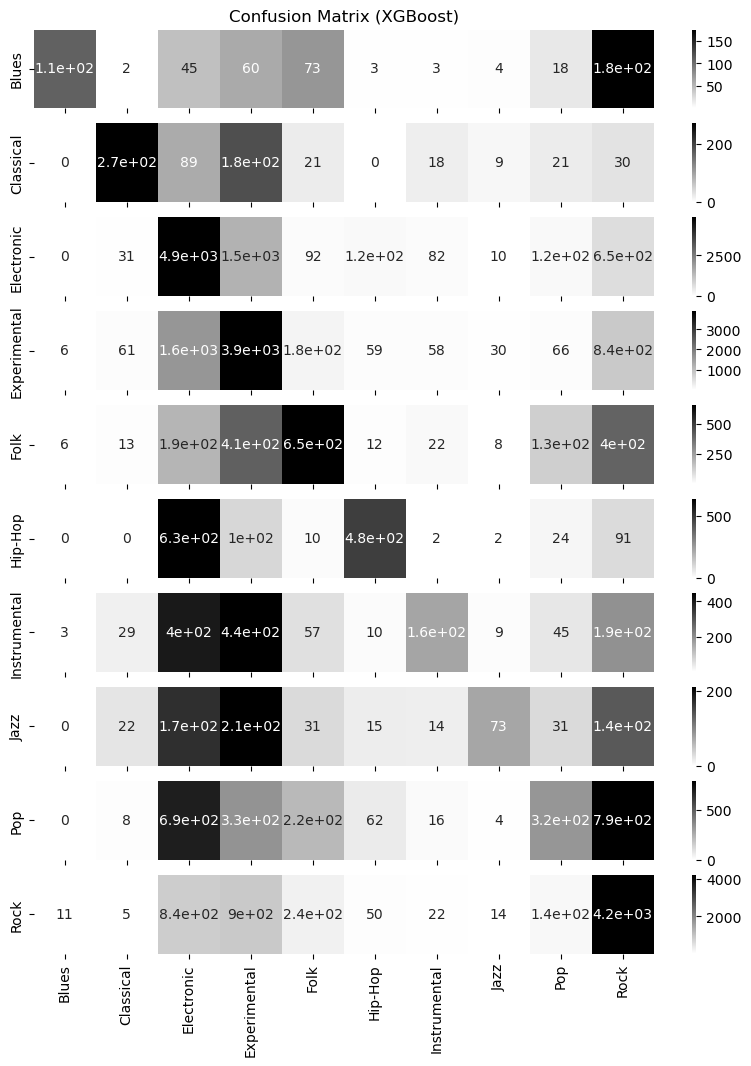

In [40]:
fig, axs = plt.subplots(10, figsize=(10,12), sharex=True)
axs[0].set_title('Confusion Matrix (XGBoost)')
axs[9].set_xlabel('Predicted labels')

for i in range(10):    
    sns.heatmap(confusion_matrix(y_true, y_pred)[i].reshape(1,-1), annot=True, cmap='gray_r',
                xticklabels=cat_y.categories, yticklabels=[cat_y.categories[i]], ax=axs[i])
plt.show()

Most misclassified genre pairs

- Predicted Rock for Blues

- Predicted Electronic for Hip Hop

- Predicted Electronic for Instrumental

- Predicted Experimental for Instrumental

- Predicted Experimental for Jazz

- Predicted Electronic for Pop

- Predicted Rock for Pop

Interpretation

1. The labels consist of mostly Electronic, Experimental and Rock. Therefore the model would predict the most common labels.

2. You can see some similarty in genres like rock and blues, electronic and pop or hip hop.

3. Experimental and Instrumental genres are not really musically dinstiguised genres in my opinion.

In [41]:
print("XGB classification report:",'\n')
print(classification_report(y_true, y_pred))
print(dict(zip(cat_y.categories, range(10))))

XGB classification report: 

              precision    recall  f1-score   support

           0       0.81      0.22      0.35       492
           1       0.61      0.42      0.50       642
           2       0.51      0.65      0.57      7434
           3       0.49      0.57      0.53      6777
           4       0.42      0.35      0.38      1838
           5       0.59      0.36      0.44      1336
           6       0.40      0.12      0.18      1351
           7       0.45      0.10      0.17       701
           8       0.36      0.13      0.19      2441
           9       0.56      0.66      0.60      6425

    accuracy                           0.51     29437
   macro avg       0.52      0.36      0.39     29437
weighted avg       0.50      0.51      0.49     29437

{'Blues': 0, 'Classical': 1, 'Electronic': 2, 'Experimental': 3, 'Folk': 4, 'Hip-Hop': 5, 'Instrumental': 6, 'Jazz': 7, 'Pop': 8, 'Rock': 9}


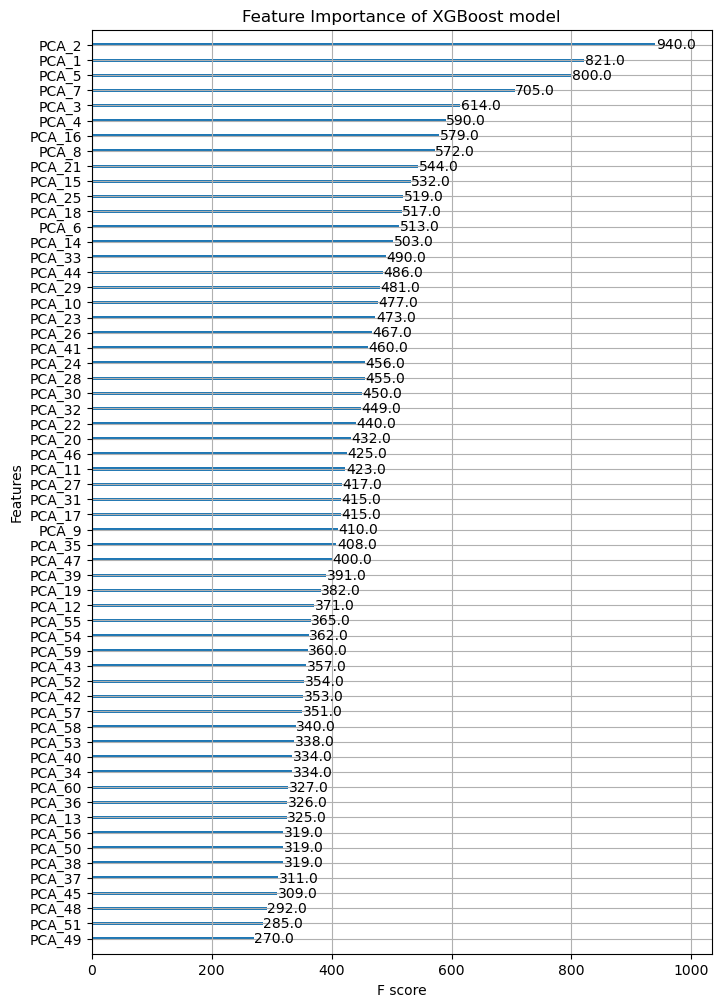

In [42]:
fig, ax = plt.subplots(figsize=(8,12))
from xgboost import plot_importance
plot_importance(xgb, ax=ax, title='Feature Importance of XGBoost model')
plt.show()

PCA2, PCA5, PCA1 have high scores. As you see the PCA factor loadings (showed in heatmap), MFCC features (mean, max, min, median) seem to be important.

And  spectral features contribute the most to PCA7.